In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahjungyun","key":"8feb0d44a134c6e6e21185543589fbcd"}'}

In [11]:
import os
import shutil

os.makedirs("/root/kaggle", exist_ok=True)
path = os.getcwd()

#파일을 복사하는데 이미 복사된 경우 복사하지 않는다.
if not os.path.exists(os.path.join(path, "kaggle.json")):
  src = os.path.join(path, "kaggle.json")
  dst = os.path.join('/root/.kaggle/', 'kaggle.json')
  shutil.copy(src,dst)
  print('파일 복사 완료')

In [12]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/kaggle.json

In [13]:
!ls -al /root/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Sep 26 08:09 .
drwx------ 1 root root 4096 Sep 26 08:09 ..
-rw-r--r-- 1 root root   65 Sep 26 08:09 kaggle.json


In [14]:
!chmod 700 /root/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:41<00:00, 22.1MB/s]
100% 812M/812M [00:41<00:00, 20.7MB/s]


In [15]:
import gdown
gdown.download(id='1TAXL6bbZf-ro36hlu4KnKmwxUR4DrBno', output='requirements.txt')

Downloading...
From: https://drive.google.com/uc?id=1TAXL6bbZf-ro36hlu4KnKmwxUR4DrBno
To: /content/requirements.txt
100%|██████████| 965/965 [00:00<00:00, 1.77MB/s]


'requirements.txt'

In [16]:
!ls

dogs-vs-cats.zip  drive  kaggle.json  requirements.txt	sample_data


In [17]:
!unzip -qq dogs-vs-cats.zip -d data

In [18]:
!ls data/

sampleSubmission.csv  test1.zip  train.zip


In [19]:
# 압축 푸는 방식
import zipfile

data = os.path.join(path,'data')
train_data = os.path.join(data,'train')
test_data = os.path.join(data,'test1')

zip_file = zipfile.ZipFile(os.path.join(data,'train.zip'))
zip_file.extractall(path=data)
zip_file.close()

zip_file = zipfile.ZipFile(os.path.join(data,'test1.zip'))
zip_file.extractall(path=data)
zip_file.close()

In [20]:
os.listdir(train_data)

['cat.2732.jpg',
 'dog.998.jpg',
 'dog.6851.jpg',
 'dog.7429.jpg',
 'cat.8960.jpg',
 'dog.8047.jpg',
 'dog.4244.jpg',
 'cat.4058.jpg',
 'dog.8145.jpg',
 'dog.5632.jpg',
 'cat.12161.jpg',
 'cat.2961.jpg',
 'dog.320.jpg',
 'cat.250.jpg',
 'cat.6234.jpg',
 'dog.3437.jpg',
 'cat.4787.jpg',
 'cat.4410.jpg',
 'cat.8405.jpg',
 'dog.4657.jpg',
 'dog.6166.jpg',
 'dog.2662.jpg',
 'cat.2085.jpg',
 'dog.2189.jpg',
 'dog.1318.jpg',
 'dog.6198.jpg',
 'dog.4252.jpg',
 'cat.6337.jpg',
 'cat.4390.jpg',
 'cat.9533.jpg',
 'dog.2572.jpg',
 'cat.5445.jpg',
 'cat.3717.jpg',
 'dog.211.jpg',
 'cat.1458.jpg',
 'dog.9784.jpg',
 'dog.1803.jpg',
 'cat.8143.jpg',
 'cat.1650.jpg',
 'dog.5108.jpg',
 'dog.740.jpg',
 'dog.1930.jpg',
 'cat.9279.jpg',
 'cat.8017.jpg',
 'cat.1384.jpg',
 'cat.6163.jpg',
 'dog.11071.jpg',
 'cat.1688.jpg',
 'dog.274.jpg',
 'dog.1400.jpg',
 'cat.11663.jpg',
 'cat.1318.jpg',
 'cat.7419.jpg',
 'dog.9778.jpg',
 'cat.11388.jpg',
 'cat.758.jpg',
 'dog.11634.jpg',
 'cat.9310.jpg',
 'cat.2564.jpg',

In [21]:
!rm -rf data/train/train
!rm -rf data/test1/test1

In [22]:
trainFiles = os.listdir(train_data)
testFiles = os.listdir(test_data)
print(len(trainFiles))
print(len(testFiles))

25000
12500


In [23]:
import random
num= random.randint(0, len(trainFiles))
trainFiles[num]

'dog.6469.jpg'

In [24]:
trainFiles[0].split('.')[0]

'cat'

In [25]:
# 이미지 분류 레이블을 만드는방법
# 방법 1은 폴더로 클래스를 나누는 방법 : 폴더명을 레이블로 사용하는 방법
# 방법 2는 csv파일을 만든다. csv파일의 컬럼 2개 (column1 : 파일명, column2 : 레이블)

# 훈련 데이터 전체 25000장. 이거 다쓰면 ..... 오늘진도 못나감
# 연습시에는 데이터 4000장만 사용(고양이 2000장, 강아지 2000장)
# train : 1000장, 1000장. valid : 500장, 500장. test : 500장, 500장.

In [26]:
# small데이터셋을 위한 폴더를 지정하고 4000장을 나눠서 보관
sdata = 'sdata'
train_sdata = os.path.join(sdata, 'train')
valid_sdata = os.path.join(sdata, 'valid')
test_sdata = os.path.join(sdata, 'test')
os.makedirs(train_sdata, exist_ok=True)
os.makedirs(valid_sdata, exist_ok=True)
os.makedirs(test_sdata, exist_ok=True)

train_sdata_dog = os.path.join(train_sdata, 'dog')
train_sdata_cat = os.path.join(train_sdata, 'cat')
os.makedirs(train_sdata_dog, exist_ok=True)
os.makedirs(train_sdata_cat, exist_ok=True)

valid_sdata_dog = os.path.join(valid_sdata, 'dog')
valid_sdata_cat = os.path.join(valid_sdata, 'cat')
os.makedirs(valid_sdata_dog, exist_ok=True)
os.makedirs(valid_sdata_cat, exist_ok=True)

test_sdata_dog = os.path.join(test_sdata, 'dog')
test_sdata_cat = os.path.join(test_sdata, 'cat')
os.makedirs(test_sdata_dog, exist_ok=True)
os.makedirs(test_sdata_cat, exist_ok=True)


In [27]:
# dog.0.jpg ~ dog.1999.jpg

# cat.0.jpg ~ cat 1999.jpg 파일들이 다있는가?

#dogList = []
#catList = []
#for i in range(2000):
  #dogList.append('dog.' + str(i) + '.jpg')
  #catList.append('cat.' + str(i) + '.jpg')

In [28]:
#dogList

In [29]:
# trainFiles에서 0~1999파일만 리스트에 담기
dogList = [filename for filename in trainFiles if filename.startswith('dog.') and int(filename.split('.')[1]) < 2000]
catList = [filename for filename in trainFiles if filename.startswith('cat.') and int(filename.split('.')[1]) < 2000]

print(len(dogList),len(catList))

2000 2000


In [30]:
train_num = 1000
valid_num = 500
test_num  = 500

from os.path import split
for filename in trainFiles:
    split_filename = filename.split('.')
    if split_filename[0] == 'dog':
        if int(split_filename[1]) < train_num:
            src = os.path.join(train_data,filename)
            dst = os.path.join(train_sdata_dog,filename)
        elif int(split_filename[1]) < train_num + valid_num:
            src = os.path.join(train_data,filename)
            dst = os.path.join(valid_sdata_dog,filename)
        elif int(split_filename[1]) < train_num + valid_num + test_num:
            src = os.path.join(train_data,filename)
            dst = os.path.join(test_sdata_dog,filename)

        shutil.copy(src,dst)

    elif split_filename[0] == 'cat':
        if int(split_filename[1]) < train_num:
            src = os.path.join(train_data,filename)
            dst = os.path.join(train_sdata_cat,filename)
        elif int(split_filename[1]) < train_num + valid_num:
            src = os.path.join(train_data,filename)
            dst = os.path.join(valid_sdata_cat,filename)
        elif int(split_filename[1]) < train_num + valid_num + test_num:
            src = os.path.join(train_data,filename)
            dst = os.path.join(test_sdata_cat,filename)

        shutil.copy(src,dst)


In [31]:
dirList = [train_sdata_dog, train_sdata_cat, valid_sdata_dog, valid_sdata_cat, test_sdata_dog, test_sdata_cat]

for dir in dirList:
    print(len(os.listdir(dir)))



1000
1000
500
500
500
500


In [32]:
!rm -rf sdata

In [33]:
import os
import shutil

# 데이터셋 디렉토리 경로 설정 (데이터셋이 저장된 경로로 수정하세요)
dataset_dir = 'data/train'

# 새로운 train, valid, test 디렉토리 생성 경로
base_dir = 'sdata'

# 클래스 목록
classes = ['dog', 'cat']

# 폴더 경로 생성
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# 폴더 생성 함수
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# train, valid, test 폴더 및 각각의 클래스 폴더 생성
for cls in classes:
    create_dir(os.path.join(train_dir, cls))
    create_dir(os.path.join(valid_dir, cls))
    #create_dir(os.path.join(test_dir, cls))

# 이미지 복사 함수
def copy_images(start_idx, end_idx, src_dir, dst_dir, label):
    for i in range(start_idx, end_idx + 1):
        file_name = f'{label}.{i}.jpg'
        src_path = os.path.join(src_dir, file_name)
        dst_path = os.path.join(dst_dir, file_name)
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)

# 클래스별로 train, valid, test 데이터셋 구성
for cls in classes:
    # train dataset 구성 (0~999)
    copy_images(0, 999, dataset_dir, os.path.join(train_dir, cls), cls)

    # valid dataset 구성 (1000~1249)
    copy_images(1000, 1499, dataset_dir, os.path.join(valid_dir, cls), cls)

    # test dataset 구성 (1250~1499)
    #copy_images(1500, 1999, dataset_dir, os.path.join(test_dir, cls), cls)

print("데이터셋 분할 및 복사가 완료되었습니다.")

데이터셋 분할 및 복사가 완료되었습니다.


In [34]:
# 위에서 복사된 파일들 갯수 확인하기
train_cat = os.listdir(os.path.join(train_dir, 'cat'))
train_dog = os.listdir(os.path.join(train_dir, 'dog'))
valid_cat = os.listdir(os.path.join(valid_dir, 'cat'))
valid_dog = os.listdir(os.path.join(valid_dir, 'dog'))
#test_cat = os.listdir(os.path.join(test_dir, 'cat'))
#test_dog = os.listdir(os.path.join(test_dir, 'dog'))

print(len(train_cat), len(train_dog), len(valid_cat), len(valid_dog))

1000 1000 500 500


In [35]:
testFiles[0]

'2194.jpg'

array([[[ 40,  44,  39],
        [ 40,  44,  39],
        [ 43,  44,  40],
        ...,
        [173, 204, 207],
        [166, 199, 202],
        [163, 198, 201]],

       [[ 41,  45,  40],
        [ 41,  45,  40],
        [ 43,  44,  40],
        ...,
        [169, 200, 203],
        [163, 196, 199],
        [159, 194, 197]],

       [[ 41,  45,  40],
        [ 41,  45,  40],
        [ 43,  44,  40],
        ...,
        [166, 195, 199],
        [164, 194, 199],
        [162, 194, 199]],

       ...,

       [[ 31,  30,  32],
        [ 29,  28,  30],
        [ 25,  24,  26],
        ...,
        [ 17,  23,  36],
        [ 24,  30,  41],
        [ 40,  46,  57]],

       [[ 31,  30,  32],
        [ 29,  28,  30],
        [ 25,  24,  26],
        ...,
        [ 21,  29,  42],
        [ 25,  34,  44],
        [ 36,  45,  55]],

       [[ 31,  30,  32],
        [ 28,  27,  29],
        [ 24,  23,  25],
        ...,
        [ 30,  38,  51],
        [ 23,  32,  42],
        [ 21,  30,  40]]], dtype=uint8)
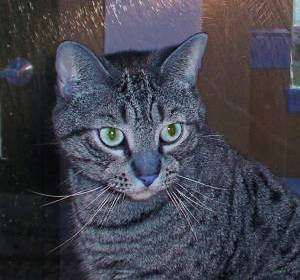

In [36]:
import cv2
img = cv2.imread(os.path.join(os.path.join(train_dir,'cat', train_cat[4])))
img

In [37]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image

# 이미지 4000장을 customDataset 클래스를 만들어서 사용
class customDataset(Dataset):
    def __init__(self, files, root_dir, mode, transform=None):
        self.files = files
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform

        # 레이블 생성 cat=0, dog=1
        if 'dog' in files[0]:
            self.label = 1
        else:
            self.label = 0

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.root_dir, self.files[idx])
        img = Image.open(img_path)

        if self.transform:
            img = self.transform(img)

        if self.mode == 'train':
            return img, np.array([self.label])

        else:
            return img, self.files[idx]

In [38]:
from torchvision import transforms

org_size =(256,256)
img_size = 224

train_transform = transforms.Compose([
    #이미지 사이즈가 파일마다 제 각각
    transforms.Resize(org_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(img_size),
    transforms.ToTensor(),
    # 평균이 0.5 표준편차 0.5 (0~1사이의 실수)
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

test_transform = transforms.Compose([
    transforms.Resize(org_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])

In [51]:
# 파일 목록, 파일디렉토리, 모드, transform
train_dog_dataset = customDataset(train_dog, os.path.join(train_dir, 'dog'), 'train', transform=train_transform)
train_cat_dataset = customDataset(train_cat, os.path.join(train_dir, 'cat'), 'train', transform=train_transform)

valid_dog_dataset = customDataset(valid_dog, os.path.join(valid_dir, 'dog'), 'train', transform=test_transform)
valid_cat_dataset = customDataset(valid_cat, os.path.join(valid_dir, 'cat'), 'train', transform=test_transform)

#test_dog_dataset = customDataset(test_dog, os.path.join(test_dir), 'test', transform=test_transform)
#test_cat_dataset = customDataset(test_cat, os.path.join(test_dir), 'test', transform=test_transform)

from torch.utils.data import ConcatDataset

train_dataset = ConcatDataset([train_dog_dataset, train_cat_dataset])
valid_dataset = ConcatDataset([valid_cat_dataset, valid_dog_dataset])
#test_dataset = ConcatDataset([test_cat_dataset, test_dog_dataset])

In [52]:
from torch.utils.data import DataLoader

batch_size=32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
#test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [53]:
import matplotlib.pyplot as plt

In [54]:
import numpy as np

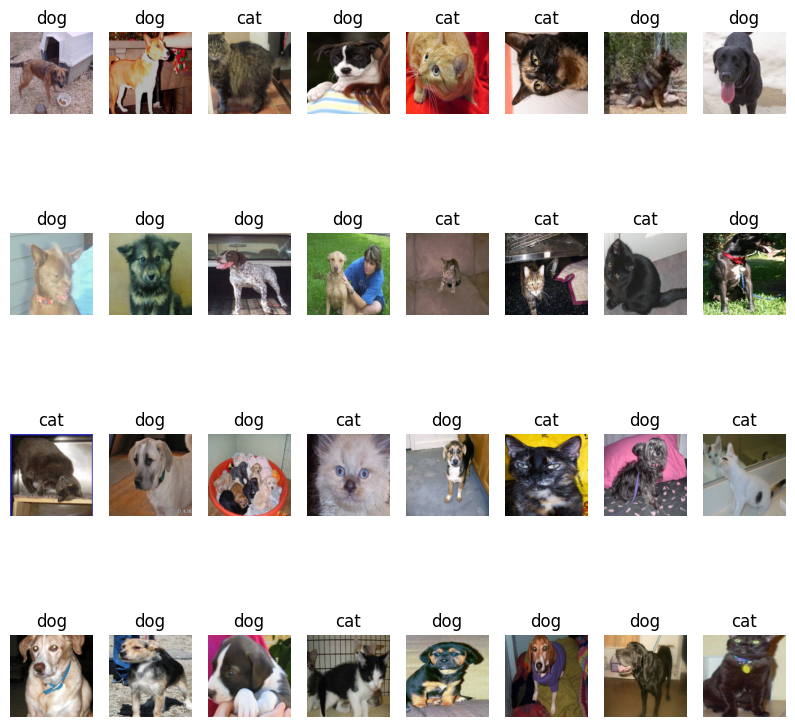

In [55]:
img, label = next(iter(train_loader))
img.shape, label.shape

classes = {0:'cat', 1:'dog'}

fig = plt.figure(figsize=(10,10))
for i in range(batch_size):
    ax = fig.add_subplot(4, 8, i+1)
    ax.set_title(classes[label[i].item()])
    ax.axis('off')
    ax.imshow(img[i].permute(1,2,0))

plt.show()


In [56]:
import torch
from torchvision.models import resnet50

# imageNet에 사전학습된 모델을 가져와서 학습(Train)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = resnet50(pretrained=True).to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [57]:
!pip install torchsummary
from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [58]:
# 특징 추출기는 그대로 사용하고, 분류기만 2개짜리로 변경
# fc ->분류기 in_features -> 분류기의 입력
num_features = model.fc.in_features

# 분류기는 2개로 변경
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(512, 2),
    torch.nn.Softmax(dim=1)
    ).to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [59]:
model = resnet50(pretrained=True).to(device)
# 특징 추출기는 그대로 사용하고, 분류기만 2개짜리로 변경
# fc -> 분류기 in_features -> 분류기의 입력
num_features = model.fc.in_features

# 이진 분류(binary classifier)
# 최종 출력 노드의 갯수 : 1개 (cf. 0.2   0의 클래스일 확률이 더 높은 것)
# sigmoid()

# 다중 분류(multi-label classifier)
# 최종 출력 노드의 갯수 : 2개(cf. [0.8, 0.2], [0.3, 0.7])
# softmax()


# 분류기는 2개로 변경
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 256),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.5),
    torch.nn.Linear(256, 1),
    torch.nn.Sigmoid()
    ).to(device)

model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [60]:
import time
# 학습 진행
def fit(model, criterion, optimizer, epochs, train_loader, valid_loader):
    # # 훈련 모드
    # model.train()

    train_loss = 0
    train_acc = 0
    train_correct = 0

    # 그래프로 출력하기 위한 리스트
    train_losses = []
    train_accuracies = []
    valid_losses = []
    valid_accuracies = []


    for epoch in range(epochs):
        start = time.time()

        # 1epoch중에 train에 해당하는 for문
        for train_x, train_y in train_loader:
            model.train()
            train_x, train_y = train_x.to(device), train_y.to(device).float()
            optimizer.zero_grad()
            pred = model(train_x)
            loss = criterion(pred, train_y)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            # 활성화 함수 sigmoid를 쓰면
            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            # train_y와 y_pred이 같으면 correct 갯수 추가
            train_correct += y_pred.eq(train_y.cpu()).int().sum()

        # validation에 해당하는 for문
        # validation data check
        valid_loss = 0
        valid_acc = 0
        valid_correct = 0
        for valid_x, valid_y in valid_loader:
            with torch.no_grad():
                model.eval()
                valid_x, valid_y = valid_x.to(device), valid_y.to(device).float()
                pred = model(valid_x)
                loss = criterion(pred, valid_y)
            valid_loss += loss.item()

            y_pred = pred.cpu()
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
            valid_correct += y_pred.eq(valid_y.cpu()).int().sum()

        train_acc = train_correct/len(train_loader.dataset)
        valid_acc = valid_correct/len(valid_loader.dataset)

        print(f'{time.time() - start:.3f}sec : [Epoch {epoch+1}/{epochs}] -> train loss: {train_loss/len(train_loader):.4f}, train acc: {train_acc*100:.3f}% / valid loss: {valid_loss/len(valid_loader):.4f}, valid acc: {valid_acc*100:.3f}%')

        train_losses.append(train_loss/len(train_loader))
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss/len(valid_loader))
        valid_accuracies.append(valid_acc)

        train_loss = 0
        train_acc = 0
        train_correct = 0

    plt.plot(train_losses, label='loss')
    plt.plot(train_accuracies, label='accuracy')
    plt.legend()
    plt.title('train loss and accuracy')
    plt.show()

    plt.plot(valid_losses, label='loss')
    plt.plot(valid_accuracies, label='accuracy')
    plt.legend()
    plt.title('valid loss and accuracy')
    plt.show()


48.573sec : [Epoch 1/10] -> train loss: 0.4112, train acc: 81.150% / valid loss: 2.2754, valid acc: 51.500%
37.563sec : [Epoch 2/10] -> train loss: 0.2982, train acc: 88.100% / valid loss: 2.4371, valid acc: 52.500%
39.244sec : [Epoch 3/10] -> train loss: 0.2441, train acc: 90.200% / valid loss: 0.9947, valid acc: 54.800%
36.924sec : [Epoch 4/10] -> train loss: 0.2131, train acc: 91.650% / valid loss: 3.7660, valid acc: 53.500%
37.022sec : [Epoch 5/10] -> train loss: 0.2276, train acc: 90.500% / valid loss: 1.6532, valid acc: 50.000%
38.469sec : [Epoch 6/10] -> train loss: 0.1961, train acc: 92.300% / valid loss: 0.8586, valid acc: 55.200%
36.451sec : [Epoch 7/10] -> train loss: 0.1549, train acc: 93.900% / valid loss: 0.6714, valid acc: 63.800%
37.308sec : [Epoch 8/10] -> train loss: 0.1448, train acc: 94.650% / valid loss: 0.7548, valid acc: 60.100%
37.418sec : [Epoch 9/10] -> train loss: 0.1629, train acc: 94.000% / valid loss: 0.6267, valid acc: 64.600%
36.635sec : [Epoch 10/10] ->

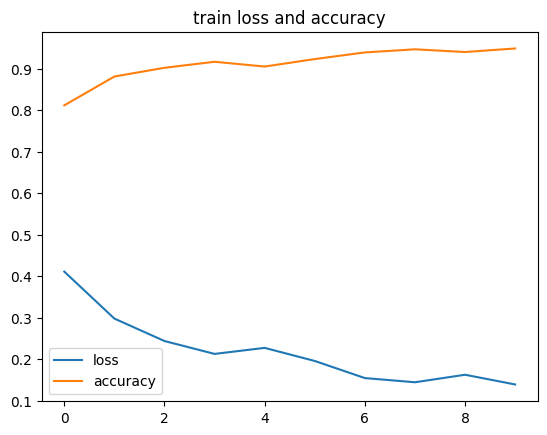

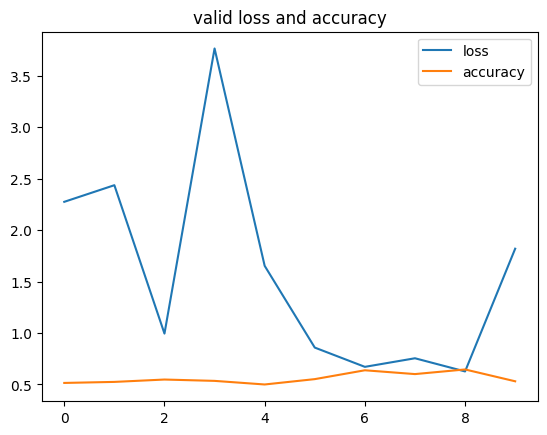

In [61]:
LR = 0.00001
EPOCHS = 15
# 손실함수
# 신경망에 sigmoid를 섯으므로 BCELoss()사용
# 망약 신경망에 softmax를 썼다면 CELoss()tkdyd
criterion = torch.nn.BCELoss()
# optimizer 정의
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# 학습

fit(model, criterion, optimizer, 10, train_loader, valid_loader)